In [2]:
# Importing necessary modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import RocCurveDisplay

In [3]:
# Loading the dataset
interview_df = pd.read_csv("pre interview acceptenes.csv")
interview_df.head()

,Age,BusinessTravel,Education,MaritalStatus,OverTime,EmployeeNumber,DailyRate,Gender,accepted for the interview
0,41,Travel_Rarely,2,Single,Yes,1,1102,Female,True
1,49,Travel_Frequently,1,Married,No,2,279,Male,False
2,37,Travel_Rarely,2,Single,Yes,4,1373,Male,False
3,33,Travel_Frequently,4,Married,Yes,5,1392,Female,False
4,27,Travel_Rarely,1,Married,No,7,591,Male,False


In [4]:
interview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1492 non-null   int64 
 1   BusinessTravel              1492 non-null   object
 2   Education                   1492 non-null   int64 
 3   MaritalStatus               1492 non-null   object
 4   OverTime                    1492 non-null   object
 5   EmployeeNumber              1492 non-null   int64 
 6   DailyRate                   1492 non-null   int64 
 7   Gender                      1492 non-null   object
 8   accepted for the interview  1492 non-null   bool  
dtypes: bool(1), int64(4), object(4)
memory usage: 94.8+ KB


In [5]:
interview_df.describe()

,Age,Education,EmployeeNumber,DailyRate
count,1492.000000,1492.000000,1492.000000,1492.000000
mean,36.885389,2.916220,1036.963137,804.987936
std,9.102789,1.021738,605.700269,403.804253
min,18.000000,1.000000,1.000000,0.000000
25%,30.000000,2.000000,496.750000,466.750000
50%,36.000000,3.000000,1034.500000,804.500000
75%,43.000000,4.000000,1581.250000,1162.000000
max,60.000000,5.000000,2068.000000,1499.000000


Data visualization

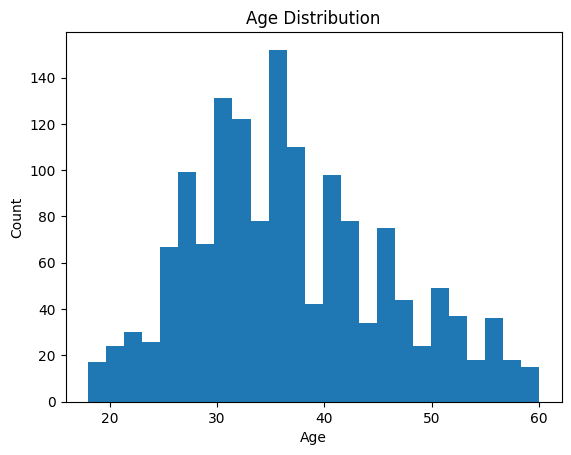

In [6]:
plt.hist(x = interview_df['Age'], bins = 25)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

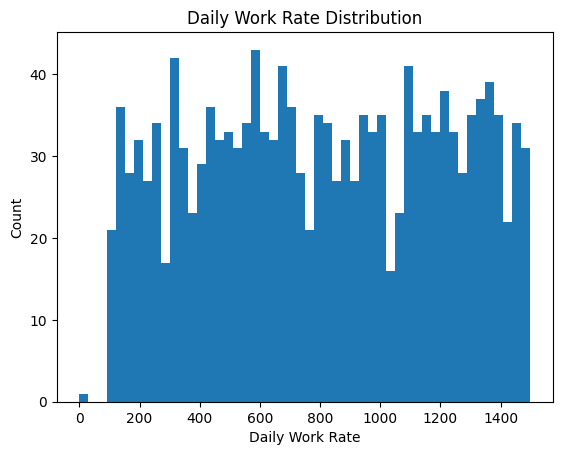

In [7]:
plt.hist(x = interview_df['DailyRate'], bins = 50)
plt.xlabel('Daily Work Rate')
plt.ylabel('Count')
plt.title('Daily Work Rate Distribution')
plt.show()

<Axes: title={'center': 'Education level'}>

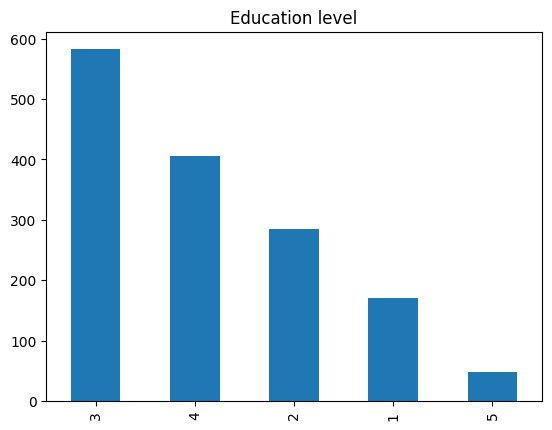

In [8]:
interview_df.Education.value_counts().plot(kind='bar', title='Education level')

<Axes: title={'center': 'Travels or not'}>

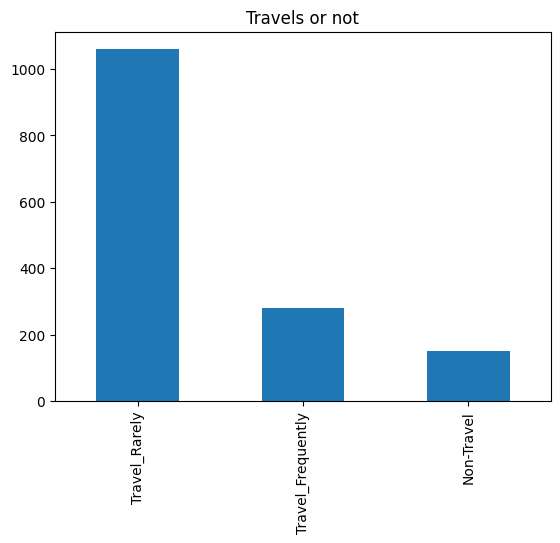

In [9]:
interview_df.BusinessTravel.value_counts().plot(kind='bar', title='Travels or not')

<Axes: title={'center': 'Married or not'}>

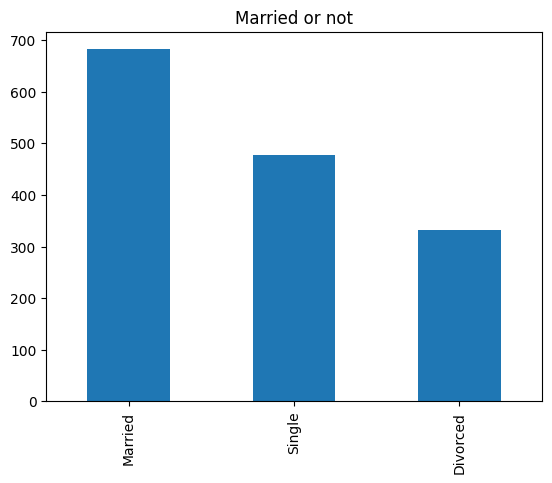

In [10]:
interview_df.MaritalStatus.value_counts().plot(kind='bar', title='Married or not')

<Axes: title={'center': 'Gender'}>

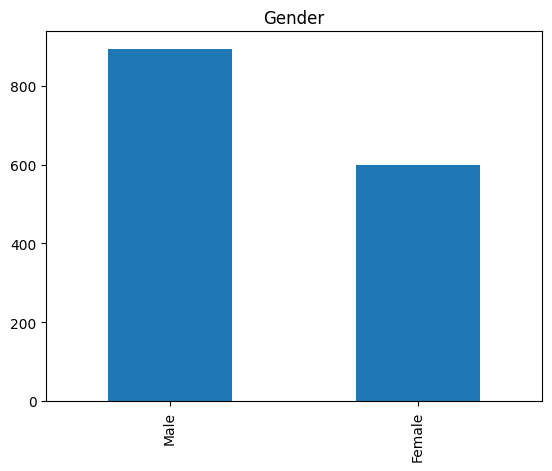

In [11]:
interview_df.Gender.value_counts().plot(kind='bar', title='Gender')

<Axes: title={'center': 'Works overtime or not'}>

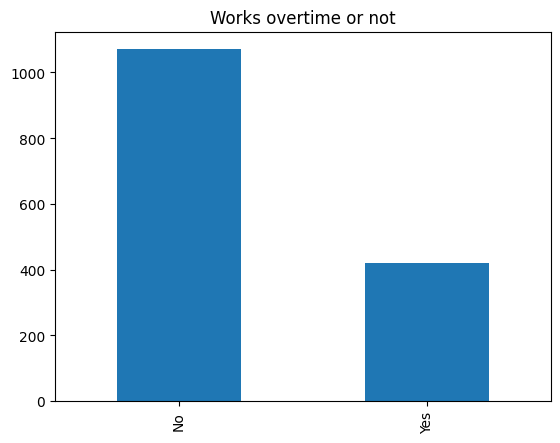

In [12]:
interview_df.OverTime.value_counts().plot(kind='bar', title='Works overtime or not')

<Axes: title={'center': 'accepted for the interview'}>

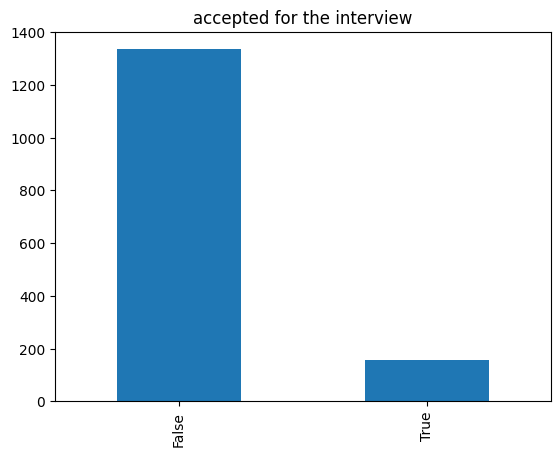

In [13]:
interview_df['accepted for the interview'].value_counts().plot(kind='bar', title='accepted for the interview')

Data Preprocessing

In [14]:
# Getting features and a label
X = interview_df.drop(['accepted for the interview', 'EmployeeNumber'], axis=1)
Y = interview_df['accepted for the interview']

In [15]:
# Splitting our data into 'train' and 'test' parts
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
x_train

,Age,BusinessTravel,Education,MaritalStatus,OverTime,DailyRate,Gender
532,47,Travel_Rarely,4,Single,No,703,Male
534,53,Travel_Rarely,3,Married,No,970,Male
1108,35,Travel_Rarely,3,Single,No,992,Male
490,38,Travel_Rarely,1,Single,No,362,Female
933,28,Travel_Rarely,3,Single,No,640,Male
...,...,...,...,...,...,...,...
1130,35,Travel_Rarely,3,Married,No,750,Male
1294,41,Travel_Rarely,3,Single,No,447,Male
860,22,Travel_Frequently,4,Married,Yes,1256,Male
1459,29,Travel_Rarely,2,Married,Yes,1378,Male


In [17]:
y_train

532     False
534     False
1108    False
490     False
933     False
        ...  
1130    False
1294    False
860     False
1459    False
1126    False
Name: accepted for the interview, Length: 1193, dtype: bool

In [18]:
x_train_final = x_train.copy()
y_train_final = y_train.copy()
x_test_final = x_test.copy()
y_test_final = y_test.copy()

Scaling numerical values in our data and turning categorical ones into numbers

In [19]:
scaler = StandardScaler()
x_train_final[['Age', 'Education', 'DailyRate']] = scaler.fit_transform(x_train_final[['Age', 'Education', 'DailyRate']])

In [20]:
x_train_final

,Age,BusinessTravel,Education,MaritalStatus,OverTime,DailyRate,Gender
532,1.119224,Travel_Rarely,1.066847,Single,No,-0.260775,Male
534,1.776381,Travel_Rarely,0.098977,Married,No,0.398235,Male
1108,-0.195091,Travel_Rarely,0.098977,Single,No,0.452535,Male
490,0.133488,Travel_Rarely,-1.836761,Single,No,-1.102431,Female
933,-0.961774,Travel_Rarely,0.098977,Single,No,-0.416271,Male
...,...,...,...,...,...,...,...
1130,-0.195091,Travel_Rarely,0.098977,Married,No,-0.144769,Male
1294,0.462067,Travel_Rarely,0.098977,Single,No,-0.892634,Male
860,-1.618931,Travel_Frequently,1.066847,Married,Yes,1.104140,Male
1459,-0.852248,Travel_Rarely,-0.868892,Married,Yes,1.405260,Male


In [21]:
x_test_final[['Age', 'Education', 'DailyRate']] = scaler.transform(x_test_final[['Age', 'Education', 'DailyRate']])

In [22]:
enc = OrdinalEncoder()
x_train_final[['BusinessTravel', 'MaritalStatus', 'OverTime', 'Gender']] = enc.fit_transform(x_train_final[['BusinessTravel', 'MaritalStatus', 'OverTime', 'Gender']])

In [23]:
x_train_final

,Age,BusinessTravel,Education,MaritalStatus,OverTime,DailyRate,Gender
532,1.119224,2.0,1.066847,2.0,0.0,-0.260775,1.0
534,1.776381,2.0,0.098977,1.0,0.0,0.398235,1.0
1108,-0.195091,2.0,0.098977,2.0,0.0,0.452535,1.0
490,0.133488,2.0,-1.836761,2.0,0.0,-1.102431,0.0
933,-0.961774,2.0,0.098977,2.0,0.0,-0.416271,1.0
...,...,...,...,...,...,...,...
1130,-0.195091,2.0,0.098977,1.0,0.0,-0.144769,1.0
1294,0.462067,2.0,0.098977,2.0,0.0,-0.892634,1.0
860,-1.618931,1.0,1.066847,1.0,1.0,1.104140,1.0
1459,-0.852248,2.0,-0.868892,1.0,1.0,1.405260,1.0


In [24]:
x_test_final[['BusinessTravel', 'MaritalStatus', 'OverTime', 'Gender']] = enc.transform(x_test_final[['BusinessTravel', 'MaritalStatus', 'OverTime', 'Gender']])

In [25]:
# Encoding the labels
enc2 = LabelEncoder()
y_train_final = enc2.fit_transform(y_train_final)

In [26]:
y_test_final = enc2.transform(y_test_final)

In [27]:
y_train_final

array([0, 0, 0, ..., 0, 0, 0])

Building machine learning models

Logistic regression first

In [28]:
# Building and fitting the model
model_log = LogisticRegression(random_state=42)
model_log.fit(x_train_final, y_train_final)

LogisticRegression(random_state=42)

In [29]:
# Evaluating the model
model_log.score(x_test_final, y_test_final)

0.9063545150501672

In [30]:
# Classification report
print(classification_report(y_test_final, model_log.predict(x_test_final)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       268
           1       0.59      0.32      0.42        31

    accuracy                           0.91       299
   macro avg       0.76      0.65      0.68       299
weighted avg       0.89      0.91      0.89       299



In [31]:
# Confusion matrix
cm_log = confusion_matrix(y_test_final, model_log.predict(x_test_final))
cm_log

array([[261,   7],
       [ 21,  10]])

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

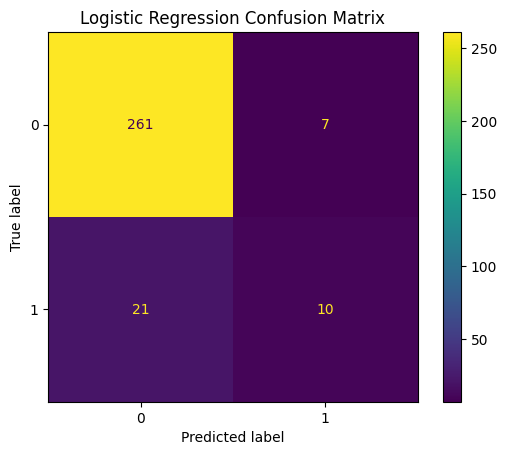

In [32]:
# Visualizing our confusion  matrix
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp_log.plot()
disp_log.ax_.set_title("Logistic Regression Confusion Matrix")

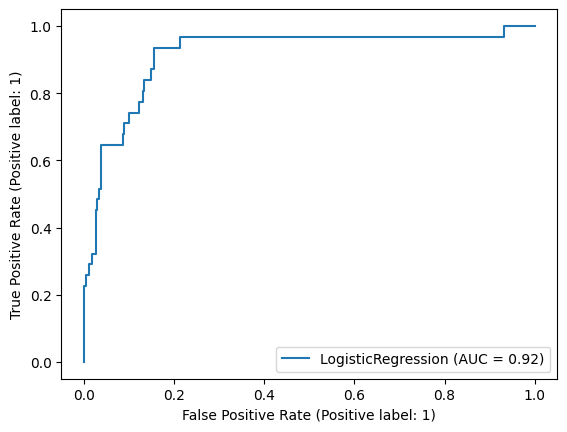

In [33]:
# ROC curve
RocCurveDisplay.from_estimator(model_log, x_test_final, y_test_final)
plt.show()

Naive Bayes

In [35]:
# Building and fitting the model
model_bayes = GaussianNB()
model_bayes.fit(x_train_final, y_train_final)

GaussianNB()

In [36]:
# Evaluating the model
model_bayes.score(x_test_final, y_test_final)

0.8662207357859532

In [37]:
# Classification report
print(classification_report(y_test_final, model_bayes.predict(x_test_final)))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       268
           1       0.43      0.97      0.60        31

    accuracy                           0.87       299
   macro avg       0.72      0.91      0.76       299
weighted avg       0.94      0.87      0.89       299



In [38]:
# Confusion matrix
cm_bayes = confusion_matrix(y_test_final, model_bayes.predict(x_test_final))
cm_bayes

array([[229,  39],
       [  1,  30]])

Text(0.5, 1.0, 'Naive Bayes Confusion Matrix')

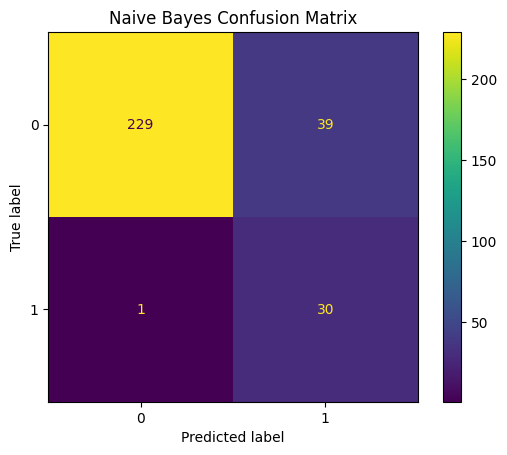

In [39]:
# Visualizing our confusion  matrix
disp_bayes = ConfusionMatrixDisplay(confusion_matrix=cm_bayes)
disp_bayes.plot()
disp_bayes.ax_.set_title("Naive Bayes Confusion Matrix")

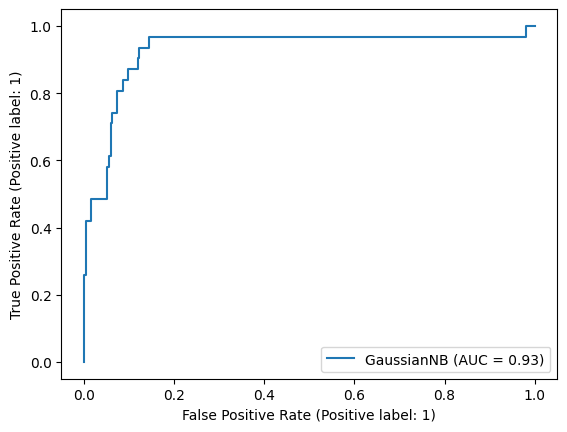

In [40]:
# ROC curve
RocCurveDisplay.from_estimator(model_bayes, x_test_final, y_test_final)
plt.show()

K nearest neighbors

In [41]:
# Building and fitting the model
# 5 seems to be the best value for number of neighbors
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train_final, y_train_final)

KNeighborsClassifier()

In [42]:
# Evaluating the model
model_knn.score(x_test_final, y_test_final)

0.979933110367893

In [43]:
# Classification report
print(classification_report(y_test_final, model_knn.predict(x_test_final)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       268
           1       1.00      0.81      0.89        31

    accuracy                           0.98       299
   macro avg       0.99      0.90      0.94       299
weighted avg       0.98      0.98      0.98       299



In [44]:
# Confusion matrix
cm_knn = confusion_matrix(y_test_final, model_knn.predict(x_test_final))
cm_knn

array([[268,   0],
       [  6,  25]])

Text(0.5, 1.0, 'K Nearest Neighbor Confusion Matrix')

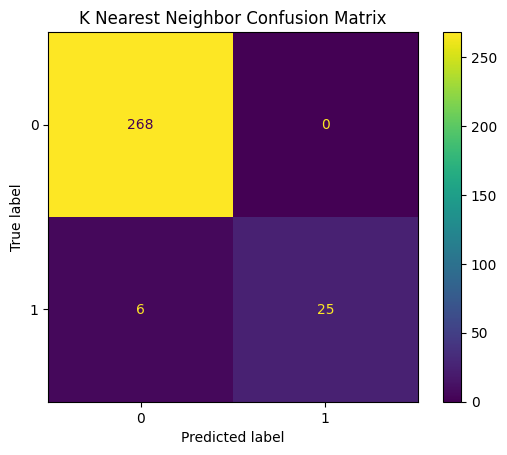

In [45]:
# Visualizing our confusion  matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
disp_knn.ax_.set_title("K Nearest Neighbor Confusion Matrix")

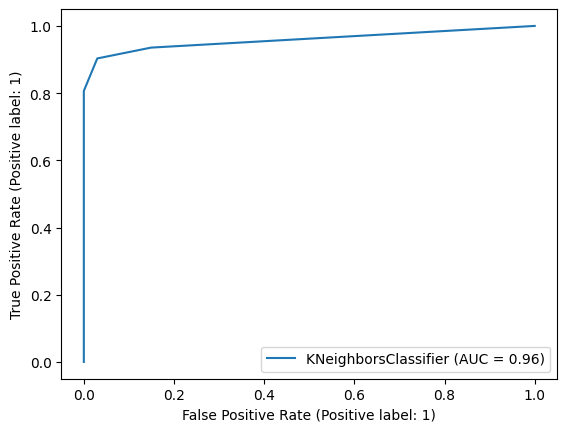

In [46]:
# ROC curve
RocCurveDisplay.from_estimator(model_knn, x_test_final, y_test_final)
plt.show()